<a href="https://colab.research.google.com/github/Mupparty/PRODIGIY_ML_01/blob/main/Capstone_Chatgpt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cappic.jpg to cappic.jpg
Uploaded file: cappic.jpg


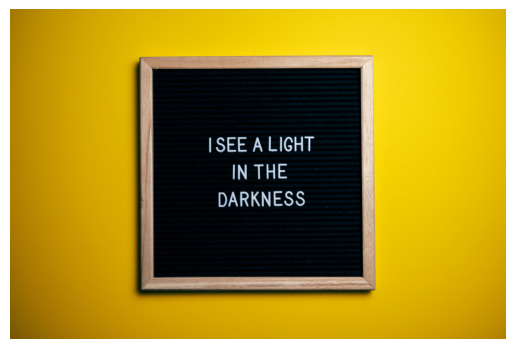

In [ ]:
# Step 1: Upload and display the image

# Import necessary libraries
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Upload the image file
uploaded = files.upload()

# Display the uploaded image
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")
    img = Image.open(file_name)  # Open the image
    plt.imshow(img)             # Display the image
    plt.axis("off")             # Remove axis for better display
    plt.show()


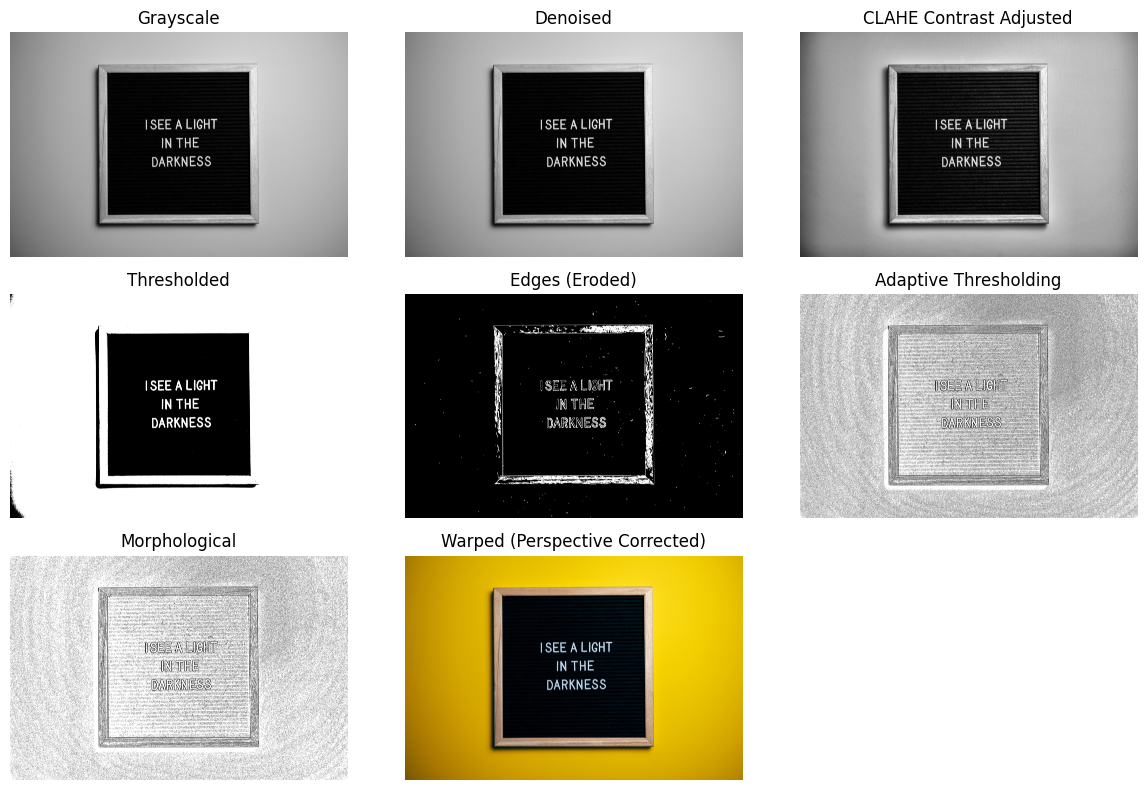

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread("/content/cappic.jpg")

# Step 1: Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Denoising using Gaussian Blur (lower kernel size to avoid over-blurring)
denoised = cv2.GaussianBlur(gray, (5, 5), 0)  # Lighter blur to preserve edges

# Step 3: Contrast Adjustment using CLAHE (moderate clip limit)
clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8, 8))  # Moderate contrast to enhance text visibility
contrast_adjusted = clahe.apply(denoised)

# Step 4: Thresholding (lower threshold to avoid excessive black borders)
# Choose threshold to isolate the text from the background (Text will become white)
_, thresholded = cv2.threshold(contrast_adjusted, 80, 255, cv2.THRESH_BINARY)

# Step 5: Edge Detection using Canny (increased contrast for better text visibility)
edges = cv2.Canny(contrast_adjusted, 50, 200)  # Increased upper threshold for better edge contrast

# Step 6: Dilation (increased iterations to enhance edges)
kernel = np.ones((3, 3), np.uint8)
edges_dilated = cv2.dilate(edges, kernel, iterations=3)  # More dilation to increase the white areas

# Step 7: Erosion (light erosion to clean up edges)
edges_eroded = cv2.erode(edges_dilated, kernel, iterations=1)  # Light erosion to retain text details

# Step 8: Adaptive Thresholding (to handle uneven lighting)
adaptive_binary = cv2.adaptiveThreshold(contrast_adjusted, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)

# Step 9: Morphological Operations (mild dilation to retain details)
morph = cv2.morphologyEx(adaptive_binary, cv2.MORPH_CLOSE, kernel)

# Step 10: Perspective Correction (if needed for better text alignment)
def reorder_points(pts):
    """Reorder points to top-left, top-right, bottom-right, bottom-left."""
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]  # Top-left
    rect[2] = pts[np.argmax(s)]  # Bottom-right

    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]  # Top-right
    rect[3] = pts[np.argmax(diff)]  # Bottom-left
    return rect

contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

warped = image  # Default to original image if no quadrilateral is found
for contour in contours:
    epsilon = 0.04 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    if len(approx) == 4:  # Ensure the contour has four points
        pts = np.array([p[0] for p in approx], dtype="float32")
        rect = reorder_points(pts)  # Reorder points consistently

        # Calculate width and height of the new image
        width_a = np.linalg.norm(rect[0] - rect[1])  # Top width
        width_b = np.linalg.norm(rect[2] - rect[3])  # Bottom width
        height_a = np.linalg.norm(rect[0] - rect[3])  # Left height
        height_b = np.linalg.norm(rect[1] - rect[2])  # Right height

        max_width = int(max(width_a, width_b))
        max_height = int(max(height_a, height_b))

        # Define destination points for perspective transform
        dst_pts = np.array([
            [0, 0],
            [max_width - 1, 0],
            [max_width - 1, max_height - 1],
            [0, max_height - 1]
        ], dtype="float32")

        # Get the perspective transformation matrix
        M = cv2.getPerspectiveTransform(rect, dst_pts)

        # Apply perspective transformation
        warped = cv2.warpPerspective(image, M, (max_width, max_height))
        break  # Use the first valid quadrilateral

# Convert warped to RGB for correct display in matplotlib
if len(warped.shape) == 3:  # If color image
    warped_display = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
else:
    warped_display = warped  # Grayscale image

# Step 11: Display results at each step
steps = [gray, denoised, contrast_adjusted, thresholded, edges_eroded, adaptive_binary, morph, warped_display]
titles = ['Grayscale', 'Denoised', 'CLAHE Contrast Adjusted', 'Thresholded', 'Edges (Eroded)', 'Adaptive Thresholding', 'Morphological', 'Warped (Perspective Corrected)']

plt.figure(figsize=(12, 8))
for i in range(len(steps)):
    plt.subplot(3, 3, i + 1)
    if i < len(steps) - 1:  # Display all steps except the last as grayscale
        plt.imshow(steps[i], cmap='gray')
    else:
        plt.imshow(steps[i])  # Display the last (RGB image) in default colormap
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# Save the preprocessed image as the preprocessed output
preprocessed_image_path = "preprocessed_image.png"
cv2.imwrite(preprocessed_image_path, denoised)  # Save the thresholded image
print(f"image saved as the preprocessed output at: {preprocessed_image_path}")

image saved as the preprocessed output at: preprocessed_image.png


Step 3

In [ ]:
!pip install paddlepaddle
!pip install paddleocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 80.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=ae262995e79ee11d5e32b4283149eac08fc343636bd5075c0e5fc4614f45d98f
  Stored 

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:17<00:00, 227.81it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:18<00:00, 532.67it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:16<00:00, 130.35it/s]

[2025/03/21 04:56:41] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_l

[2025/03/21 04:56:43] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.45026063919067383
[2025/03/21 04:56:43] ppocr DEBUG: rec_res num  : 3, elapsed : 0.17848706245422363


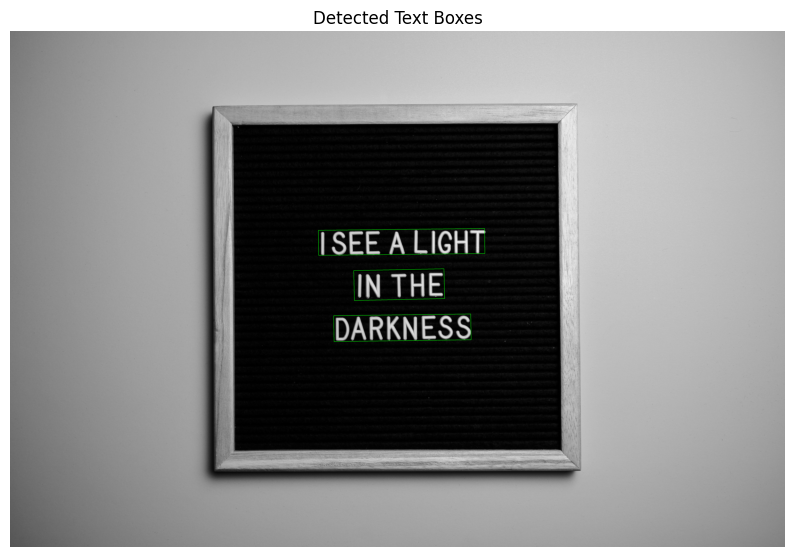

In [ ]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
import matplotlib.pyplot as plt

# Initialize PaddleOCR with the detection model
ocr = PaddleOCR(use_angle_cls=False, lang='en')  # Initialize with English language

# Load your preprocessed image (thresholded image from Step 2)
image_path = '/content/preprocessed_image.png'
image = cv2.imread(image_path)

# Perform text detection
result = ocr.ocr(image_path, cls=False)

# Extract detected text boxes
boxes = [line[0] for line in result[0]]

# Draw detected text boxes on the image
image_with_boxes = image.copy()
for box in boxes:
    box = [tuple(map(int, point)) for point in box]
    cv2.polylines(image_with_boxes, [np.array(box)], isClosed=True, color=(0, 255, 0), thickness=2)

# Convert BGR image to RGB for displaying
image_with_boxes_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

# Display the image with detected text boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes_rgb)
plt.title('Detected Text Boxes')
plt.axis('off')
plt.show()

In [ ]:
# Save the image with detected text boxes
output_image_path = '/content/detected_text_boxes.png'
cv2.imwrite(output_image_path, image_with_boxes)
print(f"Image with detected text boxes saved at: {output_image_path}")

Image with detected text boxes saved at: /content/detected_text_boxes.png


Step 4

Detected Text Boxes and Their Coordinates:
Box 1: {'x_min': 2382, 'y_min': 1524, 'x_max': 3668, 'y_max': 1731}
Box 2: {'x_min': 2655, 'y_min': 1835, 'x_max': 3357, 'y_max': 2080}
Box 3: {'x_min': 2500, 'y_min': 2184, 'x_max': 3562, 'y_max': 2397}


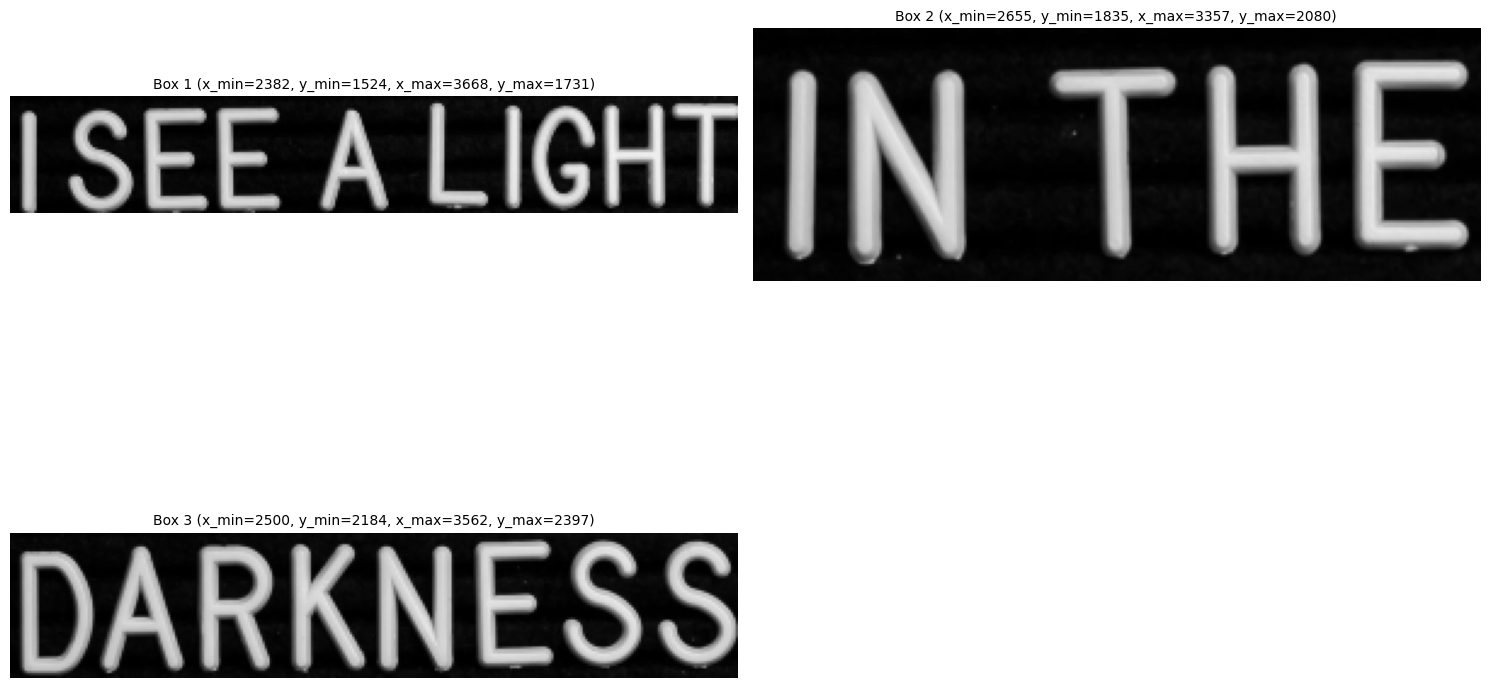

Coordinates saved to: /content/detected_boxes.json


In [ ]:
import cv2
import matplotlib.pyplot as plt
import json

# Prepare the detected text regions for the next step (text cropping) and display coordinates
cropped_images = []
detected_boxes_with_coords = []  # Store coordinates for presentation

# Define a fixed size for all cropped images (e.g., 300x300)
fixed_width = 300
fixed_height = 300

# Loop through the detected bounding boxes
for idx, box in enumerate(boxes):
    # Get the coordinates of the bounding box
    x_min = int(min([point[0] for point in box]))  # Ensure coordinates are integers
    x_max = int(max([point[0] for point in box]))  # Ensure coordinates are integers
    y_min = int(min([point[1] for point in box]))  # Ensure coordinates are integers
    y_max = int(max([point[1] for point in box]))  # Ensure coordinates are integers

    # Save coordinates for presentation
    detected_boxes_with_coords.append({
        "box_id": idx + 1,
        "coordinates": {"x_min": x_min, "y_min": y_min, "x_max": x_max, "y_max": y_max}
    })

    # Crop the image using the bounding box coordinates
    cropped_image = image[y_min:y_max, x_min:x_max]

    # Resize the cropped image to a fixed size (e.g., 300x300), maintaining aspect ratio
    aspect_ratio = float(cropped_image.shape[1]) / float(cropped_image.shape[0])
    if aspect_ratio > 1:
        new_width = fixed_width
        new_height = int(fixed_width / aspect_ratio)
    else:
        new_height = fixed_height
        new_width = int(fixed_height * aspect_ratio)

    resized_image = cv2.resize(cropped_image, (new_width, new_height))

    # Add the resized image to the list of cropped images
    cropped_images.append(resized_image)

# Display the coordinates
print("Detected Text Boxes and Their Coordinates:")
for info in detected_boxes_with_coords:
    print(f"Box {info['box_id']}: {info['coordinates']}")

# Save the coordinates to a JSON file for future reference
coordinates_file_path = "/content/detected_boxes.json"
with open(coordinates_file_path, "w") as f:
    json.dump(detected_boxes_with_coords, f, indent=4)

# Display cropped images with titles as their coordinates
plt.figure(figsize=(15, 10))
for idx, cropped_img in enumerate(cropped_images):
    coord = detected_boxes_with_coords[idx]["coordinates"]
    title = f"Box {idx + 1} (x_min={coord['x_min']}, y_min={coord['y_min']}, x_max={coord['x_max']}, y_max={coord['y_max']})"

    plt.subplot(2, len(cropped_images) // 2 + 1, idx + 1)
    plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=10)
    plt.axis("off")
plt.tight_layout()
plt.show()

# Output: Coordinates have been saved to the file
print(f"Coordinates saved to: {coordinates_file_path}")

Step 5

In [ ]:
!pip install transformers
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch
from PIL import Image

# Load the pre-trained TrOCR model and processor
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
model.eval()

# Function to recognize text from an image
def recognize_text_from_image(cropped_image):
    if cropped_image.mode != "RGB":
        cropped_image = cropped_image.convert("RGB")
    pixel_values = processor(images=cropped_image, return_tensors="pt").pixel_values
    with torch.no_grad():
        generated_ids = model.generate(pixel_values)
    return processor.decode(generated_ids[0], skip_special_tokens=True)

# Recognize text from cropped images
recognized_texts = []
for idx, cropped_image in enumerate(cropped_images):
    pil_image = Image.fromarray(cropped_image)
    recognized_text = recognize_text_from_image(pil_image)
    recognized_texts.append(f"Box {idx + 1} Recognized Text: {recognized_text}")

# Save recognized text to a file
recognized_texts_file = "/content/recognized_texts.txt"
with open(recognized_texts_file, "w") as f:
    f.write("\n".join(recognized_texts))

print(f"Step 5: Recognized texts saved to {recognized_texts_file}")

# Show the output of recognized texts
print("\nRecognized Texts:")
for text in recognized_texts:
    print(text)

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decode

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Step 5: Recognized texts saved to /content/recognized_texts.txt

Recognized Texts:
Box 1 Recognized Text: I see a light
Box 2 Recognized Text: in the
Box 3 Recognized Text: darkness


In [ ]:
# Save recognized text to a file
recognized_texts_file = "/content/recognized_texts.txt"
with open(recognized_texts_file, "w") as f:
    f.write("\n".join(recognized_texts))

print(f"Step 5: Recognized texts saved to {recognized_texts_file}")

Step 5: Recognized texts saved to /content/recognized_texts.txt


Step 6

bart

In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer

# Load pre-trained BART model and tokenizer
bart_model = BartForConditionalGeneration.from_pretrained("facebook/bart-large")
bart_tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")

# Correct text using BART
corrected_texts = []
for line in recognized_texts:
    box_info, text = line.split("Recognized Text: ")
    inputs = bart_tokenizer(text.strip(), return_tensors="pt", max_length=1024, truncation=True)
    outputs = bart_model.generate(inputs.input_ids, max_length=1024, num_beams=4, early_stopping=True)
    corrected_text = bart_tokenizer.decode(outputs[0], skip_special_tokens=True)
    corrected_texts.append(f"{box_info} Corrected Text: {corrected_text}")

# Save corrected text to a file
corrected_texts_file = "/content/corrected_texts.txt"
with open(corrected_texts_file, "w") as f:
    f.write("\n".join(corrected_texts))

print(f"Step 6: Corrected texts saved to {corrected_texts_file}")

# Show the output of corrected texts
print("\nCorrected Texts:")
for text in corrected_texts:
    print(text)

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Step 6: Corrected texts saved to /content/corrected_texts.txt

Corrected Texts:
Box 1  Corrected Text: I see a light
Box 2  Corrected Text: in the
Box 3  Corrected Text: darkness


In [ ]:
# Save corrected text to a file
corrected_texts_file = "/content/corrected_texts.txt"
with open(corrected_texts_file, "w") as f:
    f.write("\n".join(corrected_texts))

print(f"Step 6: Corrected texts saved to {corrected_texts_file}")

Step 6: Corrected texts saved to /content/corrected_texts.txt


Step 7

Part 1

In [ ]:
import json

# Load corrected text from the output of the BART model (plain text file)
def load_corrected_text(file_path):
    corrected_text_data = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for idx, line in enumerate(file, start=1):  # Assign line numbers as box_ids
            corrected_text_data[str(idx)] = line.strip()
    return corrected_text_data  # Format: {"1": "text", "2": "text", ...}

# Load bounding box coordinates from detected_boxes.json
def load_bounding_boxes(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        detected_boxes_data = json.load(file)

    bounding_boxes = {}
    for item in detected_boxes_data:
        box_id = str(item["box_id"])  # Convert to string for consistency
        bounding_boxes[box_id] = item["coordinates"]  # Store coordinates

    return bounding_boxes  # Format: {"1": {"x_min": val, "y_min": val, "x_max": val, "y_max": val}, ...}

# File paths
corrected_texts = load_corrected_text("/content/corrected_texts.txt")
bounding_boxes = load_bounding_boxes("/content/detected_boxes.json")

# Combine corrected text and bounding box coordinates
text_box_data = {
    box_id: {
        "text": corrected_texts.get(box_id, ""),
        "coordinates": coordinates
    }
    for box_id, coordinates in bounding_boxes.items()
}

# Print extracted data for verification
print(json.dumps(text_box_data, indent=4, ensure_ascii=False))

{
    "1": {
        "text": "Box 1  Corrected Text: I see a light",
        "coordinates": {
            "x_min": 2382,
            "y_min": 1524,
            "x_max": 3668,
            "y_max": 1731
        }
    },
    "2": {
        "text": "Box 2  Corrected Text: in the",
        "coordinates": {
            "x_min": 2655,
            "y_min": 1835,
            "x_max": 3357,
            "y_max": 2080
        }
    },
    "3": {
        "text": "Box 3  Corrected Text: darkness",
        "coordinates": {
            "x_min": 2500,
            "y_min": 2184,
            "x_max": 3562,
            "y_max": 2397
        }
    }
}


In [ ]:
import math
import json

# Function to calculate the center of a bounding box
def get_center(coords):
    x_center = (coords['x_min'] + coords['x_max']) / 2
    y_center = (coords['y_min'] + coords['y_max']) / 2
    return (x_center, y_center)

# Function to calculate Euclidean distance between two points
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Function to group text boxes based on proximity
def group_by_proximity(text_box_data):
    # Calculate the center for each bounding box
    centers = {box_id: get_center(data['coordinates']) for box_id, data in text_box_data.items()}
    box_ids = list(centers.keys())

    # Calculate pairwise distances
    distances = []
    for i in range(len(box_ids)):
        for j in range(i + 1, len(box_ids)):
            dist = euclidean_distance(centers[box_ids[i]], centers[box_ids[j]])
            distances.append(dist)

    # Determine dynamic threshold based on average distance
    avg_distance = sum(distances) / len(distances) if distances else 0
    threshold = avg_distance * 1.5  # Adjust multiplier as needed

    # Grouping based on threshold
    groups = []
    visited = set()

    for box_id in box_ids:
        if box_id in visited:
            continue

        group = [box_id]
        visited.add(box_id)

        for other_id in box_ids:
            if other_id != box_id and other_id not in visited:
                if euclidean_distance(centers[box_id], centers[other_id]) < threshold:
                    group.append(other_id)
                    visited.add(other_id)

        groups.append(group)

    return groups


# Load text box data from JSON (Make sure the file exists and the structure is correct)
file_path = "/content/detected_boxes.json"  # Update with your actual file path
try:
    with open(file_path, "r", encoding="utf-8") as file:
        detected_boxes_data = json.load(file)
    text_box_data = {
        str(item["box_id"]): {
            'coordinates': item["coordinates"],
            'text': item.get("text", "")  # Assuming text can be an empty string if not found
        }
        for item in detected_boxes_data
    }
except FileNotFoundError:
    print(f"File not found: {file_path}")
    text_box_data = {}

# Group by proximity
if text_box_data:
    groups = group_by_proximity(text_box_data)

    # Display grouped output
    for i, group in enumerate(groups, 1):
        print(f"Group {i}: {group}")
else:
    print("No text box data found to process.")

Group 1: ['1', '2', '3']


In [ ]:
# Save grouped output to a JSON file
output_file_path = "/content/grouped_boxes.json"  # Adjust as needed

with open(output_file_path, "w", encoding="utf-8") as output_file:
    json.dump(groups, output_file, indent=4)

print(f"Grouped output saved to {output_file_path}")

Grouped output saved to /content/grouped_boxes.json


In [ ]:
import json

# Function to perform initial grouping based on proximity
def initial_grouping(groups, text_box_data):
    box_id_to_group = {}

    for group_id, group in enumerate(groups, start=1):
        for box_id in group:
            box_id_to_group[box_id] = group_id

    initial_groups = {}

    for box_id, group in box_id_to_group.items():
        coordinates = text_box_data[box_id]['coordinates']
        text = text_box_data[box_id]['text']

        if group not in initial_groups:
            initial_groups[group] = []

        initial_groups[group].append({
            'box_id': box_id,
            'text': text,
            'coordinates': coordinates
        })

    return initial_groups

# Load grouped output from Step 2
grouped_file_path = "/content/grouped_boxes.json"
with open(grouped_file_path, "r", encoding="utf-8") as file:
    groups = json.load(file)

# Load corrected text
corrected_texts_path = "/content/corrected_texts.txt"
def load_corrected_text(file_path):
    corrected_text_data = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for idx, line in enumerate(file, start=1):
            corrected_text_data[str(idx)] = line.strip()
    return corrected_text_data
corrected_texts = load_corrected_text(corrected_texts_path)

# Load bounding boxes
bounding_boxes_path = "/content/detected_boxes.json"
def load_bounding_boxes(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        detected_boxes_data = json.load(file)
    return {str(item["box_id"]): item["coordinates"] for item in detected_boxes_data}
bounding_boxes = load_bounding_boxes(bounding_boxes_path)

# Combine corrected text and bounding box coordinates
text_box_data = {
    box_id: {
        "text": corrected_texts.get(box_id, ""),
        "coordinates": coordinates
    }
    for box_id, coordinates in bounding_boxes.items()
}

# Perform initial grouping
initial_groups = initial_grouping(groups, text_box_data)

# Save initial groups for next step
output_file_path = "/content/initial_groups.json"
with open(output_file_path, "w", encoding="utf-8") as output_file:
    json.dump(initial_groups, output_file, indent=4)

import re

# Function to clean the corrected text by removing the box number and "Corrected Text:" part
def clean_corrected_text(text):
    # Remove the "Box <number> Corrected Text:" part using regex
    cleaned_text = re.sub(r"^Box \d+  Corrected Text: ", "", text).strip()
    return cleaned_text

# Print the output in the desired format
for group_id, boxes in initial_groups.items():
    print(f"Initial Group {group_id}:")
    for box in boxes:
        # Clean the corrected text to remove the unwanted part
        cleaned_text = clean_corrected_text(box['text'])

        # Only print Box ID and the cleaned corrected text
        print(f"  Box ID: {box['box_id']} - {cleaned_text}")

Initial Group 1:
  Box ID: 1 - I see a light
  Box ID: 2 - in the
  Box ID: 3 - darkness


In [ ]:
import json

# Function to extract text from each group while preserving the box ID and corrected text
def extract_text(initial_groups, text_box_data):
    extracted_text = {}

    # Loop through each initial group
    for group_id, group_data in initial_groups.items():
        group_text = []

        # Loop through each box in the group
        for box in group_data:
            box_id = box['box_id']
            # Clean the text by only getting the corrected text and removing extra "Box X" labels
            text = box['text'].replace("Box " + str(box_id), "").replace("Corrected Text:", "").strip()

            # Append only the cleaned text, without repetition or Box X label
            group_text.append(f"Box {box_id}: {text}")

        # Store the cleaned text for this group
        extracted_text[group_id] = group_text

    return extracted_text


# Example usage
if initial_groups:
    # Extract text with box IDs from the initial groups
    extracted_text = extract_text(initial_groups, text_box_data)

    # Define the output file path
    output_file_path = "/content/extracted_text.json"

    # Open the file for writing the output as JSON
    with open(output_file_path, "w", encoding="utf-8") as file:
        # Write the extracted text with cleaned output to the file
        json.dump(extracted_text, file, indent=4, ensure_ascii=False)

    # Display the extracted text with cleaned output
    print(f"\nExtracted text with cleaned output has been saved to: {output_file_path}\n")
    print("Extracted Text with Cleaned Output:\n")

    # Print each group's text with box IDs, showing only the corrected text
    for group_id, group_texts in extracted_text.items():
        print(f"Group {group_id}:")
        for sub_group_text in group_texts:
            print(f"  {sub_group_text}")

else:
    print("No initial groups found to extract text with cleaned output.")



Extracted text with cleaned output has been saved to: /content/extracted_text.json

Extracted Text with Cleaned Output:

Group 1:
  Box 1: I see a light
  Box 2: in the
  Box 3: darkness


Step 8 - AI-Based Semantic Validation

In [ ]:
import os

# Set the environment variable
os.environ["TOGETHER_AI_API_KEY"] = "tgp_v1_x4KfXUKsThGvZgi2kP22__5WTo8yRBkpx77D8XlQteo"


In [ ]:
#2
import os
import json
import requests
import time

# Set the environment variable
os.environ["TOGETHER_AI_API_KEY"] = "tgp_v1_x4KfXUKsThGvZgi2kP22__5WTo8yRBkpx77D8XlQteo"

# Set Together AI API key from environment variable
TOGETHER_AI_API_KEY = os.getenv("TOGETHER_AI_API_KEY")

# Function to load Step 4 output from a file
def load_step4_output(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        return json.load(f)

# Function to check if text makes sense using AI with rate limit handling
def check_meaning(text):
    url = "https://api.together.xyz/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {TOGETHER_AI_API_KEY}",
        "Content-Type": "application/json"
    }
    payload = {
        "model": "meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo",
        "messages": [
            {"role": "system", "content": "You evaluate text coherence and meaning."},
            {"role": "user", "content": f"Does this text form a meaningful phrase: '{text}'? Reply with 'Yes' or 'No' only."}
        ],
        "max_tokens": 10
    }

    retries = 3
    wait_time = 10

    for attempt in range(retries):
        try:
            response = requests.post(url, headers=headers, json=payload)
            response_data = response.json()

            if "error" in response_data and "rate limit" in response_data["error"].get("message", "").lower():
                print(f"Rate limit exceeded. Waiting for {wait_time} seconds before retrying...")
                time.sleep(wait_time)
                wait_time *= 2
                continue

            reply = response_data["choices"][0]["message"]["content"].strip().lower()
            return "yes" in reply
        except Exception as e:
            print(f"Error checking meaning: {e}")
            time.sleep(wait_time)

    return False

# Function to process and merge text dynamically
def process_text_group(text_blocks):
    merged_texts = []
    separate_texts = []

    if not text_blocks:
        return merged_texts, separate_texts

    valid_blocks = [text for text in text_blocks if check_meaning(text)]
    invalid_blocks = [text for text in text_blocks if text not in valid_blocks]

    if valid_blocks:
        combined_text = " ".join(valid_blocks)

        # Check the meaning of the combined text
        if check_meaning(combined_text):
            merged_texts.append(combined_text)
        else:
            separate_texts.extend(valid_blocks)

    separate_texts.extend(invalid_blocks)

    return merged_texts, separate_texts

# Function to process text groups with AI-based meaning evaluation
def process_text_groups(data):
    final_output = []

    for group_key, group_value in data.items():
        new_group = {"Group": group_key, "Merged Text": [], "Separate Text": []}
        text_blocks = []

        if isinstance(group_value, list):
            text_blocks.extend([item.split(": ", 1)[-1].strip() for item in group_value if isinstance(item, str)])

        merged_texts, separate_texts = process_text_group(text_blocks)

        if merged_texts:
            new_group["Merged Text"].append(" ".join(merged_texts))

        new_group["Separate Text"].extend(separate_texts)

        final_output.append(new_group)

    return final_output

# Main execution
file_path = "/content/extracted_text.json"
data = load_step4_output(file_path)
processed_output = process_text_groups(data)

# Save final structured output
output_file = "/content/processed_text_groups.json"
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(processed_output, f, indent=4, ensure_ascii=False)

print(f"Processed text groups saved to {output_file}")


Rate limit exceeded. Waiting for 10 seconds before retrying...
Rate limit exceeded. Waiting for 10 seconds before retrying...
Processed text groups saved to /content/processed_text_groups.json


In [ ]:
import json

# Function to display the formatted output
def display_processed_text(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        processed_output = json.load(f)

    for group in processed_output:
        print(f"Group: {group['Group']}")

        if group["Merged Text"]:
            print("  Merged Text:")
            for text in group["Merged Text"]:
                print(f"    - {text}")

        if group["Separate Text"]:
            print("  Separate Text:")
            for text in group["Separate Text"]:
                print(f"    - {text}")

        print("=" * 50)

# Path to processed text groups file
output_file_path = "/content/processed_text_groups.json"

# Display the output
display_processed_text(output_file_path)


Group: 1
  Merged Text:
    - I see a light in the darkness


In [ ]:
import json
from transformers import MarianMTModel, MarianTokenizer

# Supported languages and their codes
languages = {
    "nl": "Dutch",
    "de": "German",
    "fr": "French",
    "es": "Spanish",
    "it": "Italian",
    "hi": "Hindi",
    "zh": "Chinese",
    "ko": "Korean",
    "ru": "Russian"
}

# Function to translate text
def translate_text(texts, target_language):
    if not texts:
        return []

    model_name = f"Helsinki-NLP/opus-mt-en-{target_language}"
    marian_model = MarianMTModel.from_pretrained(model_name)
    marian_tokenizer = MarianTokenizer.from_pretrained(model_name)

    translated_texts = []
    for text in texts:
        inputs = marian_tokenizer(text.strip(), return_tensors="pt", max_length=1024, truncation=True)
        outputs = marian_model.generate(inputs.input_ids, max_length=1024, num_beams=4, early_stopping=True)
        translated_text = marian_tokenizer.decode(outputs[0], skip_special_tokens=True)
        translated_texts.append(translated_text)

    return translated_texts

# Load processed text groups
input_file = "/content/processed_text_groups.json"
with open(input_file, "r", encoding="utf-8") as f:
    processed_data = json.load(f)

# File path for saving translations
translated_file_path = "/content/translated_text_groups.json"

# Function to process translation based on selected language
def process_translation(target_language_code):
    translated_data = []

    for group in processed_data:
        translated_group = {
            "Group": group["Group"],
            "Merged Text": group["Merged Text"],
            "Separate Text": group["Separate Text"],
            "Translated Merged Text": translate_text(group["Merged Text"], target_language_code) if group["Merged Text"] else [],
            "Translated Separate Text": translate_text(group["Separate Text"], target_language_code) if group["Separate Text"] else [],
        }
        translated_data.append(translated_group)

    # Save translated output
    with open(translated_file_path, "w", encoding="utf-8") as f:
        json.dump(translated_data, f, indent=4, ensure_ascii=False)

    return translated_data


In [ ]:
import json
from ipywidgets import widgets, VBox, Label, Dropdown, Output
from IPython.display import display

# Load translated text groups
translated_file_path = "/content/translated_text_groups.json"

# Dropdown for language selection
language_dropdown = Dropdown(
    options=["Select a Language"] + list(languages.values()),
    description="Language:",
    value="Select a Language",
)

# Output widget to display before and after text
output = Output()

# Callback function to handle translation display
def on_language_change(change):
    if change.new == "Select a Language":
        return

    output.clear_output()
    with output:
        # Get the selected language's code
        selected_lang_code = [code for code, lang in languages.items() if lang == change.new][0]

        # Process translation
        translated_data = process_translation(selected_lang_code)

        print(f"Translated into {change.new}...\n")

        # Display translated output in the required format
        for group in translated_data:
            print(f"Group: {group['Group']}")

            if group["Merged Text"]:
                print("  Merged Text:")
                for text in group["Merged Text"]:
                    print(f"    - {text}")

            if group["Translated Merged Text"]:
                print("  Translated Merged Text:")
                for text in group["Translated Merged Text"]:
                    print(f"    - {text}")

            if group["Separate Text"]:
                print("  Separate Text:")
                for text in group["Separate Text"]:
                    print(f"    - {text}")

            if group["Translated Separate Text"]:
                print("  Translated Separate Text:")
                for text in group["Translated Separate Text"]:
                    print(f"    - {text}")

            print("=" * 50)

# Attach callback to dropdown
language_dropdown.observe(on_language_change, names="value")

# Create the display interface
display_interface = VBox([Label("Select a language to translate:"), language_dropdown, output])

# Display the interface
display(display_interface)
